In [7]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback

import tensorflow as tf

In [3]:
wandb.init(project="predict balance", entity="zwiebel")

wandb: Currently logged in as: florian-rupp (zwiebel). Use `wandb login --relogin` to force relogin


In [9]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 20,
  "batch_size": 1
}

## Read data

In [10]:
data = pd.read_csv("data.csv")
data.head()
data.shape

(3000, 3)

<AxesSubplot:>

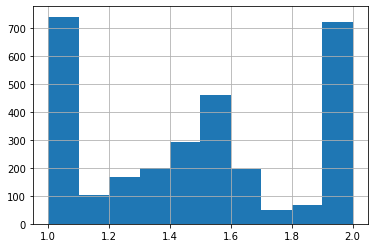

In [11]:
data["balancing"].hist()

In [12]:
data[data["balancing"] == 1.5].count()

Unnamed: 0    340
idx           340
balancing     340
dtype: int64

In [14]:
data["balancing1"] = data["balancing"] - 1

In [15]:
path_maps = "gen_maps"
SIZE = 8
BORDER = 6
X = []
for folder in os.listdir(path_maps):
    m = np.load(os.path.join(path_maps, folder, "map.npy"))
    b = BORDER + 1
    s = b+SIZE - 2
    m = (m[b:s, b:s] -1)
    m[m==8] = 2
    m[m==6] = 5

    X.append(tf.one_hot(m, 6))

In [16]:
X[15]

<tf.Tensor: shape=(6, 6, 6), dtype=float32, numpy=
array([[[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.]],

       [[0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0.

In [18]:
#tf.one_hot(X[15], 6).shape

## Training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, data["balancing1"], test_size=0.2, shuffle=True)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [20]:
len(y_train)

2400

In [21]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((6, 6, 6)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=20, callbacks=[WandbCallback()])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6, 6, 16)          112       
                                                                 
 dense_13 (Dense)            (None, 6, 6, 8)           136       
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dense_14 (Dense)            (None, 16)                4624      
                                                                 
 dense_15 (Dense)            (None, 12)                204       
                                                                 
 dense_16 (Dense)            (None, 8)                 104       
                                                                 
 dense_17 (Dense)            (None, 1)                

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
75/75 [==============================] - 0s 1ms/step - loss: 0.1363
Epoch 2/20
75/75 [==============================] - 0s 986us/step - loss: 0.1348
Epoch 3/20
75/75 [==============================] - 0s 964us/step - loss: 0.1345
Epoch 4/20
75/75 [==============================] - 0s 933us/step - loss: 0.1339
Epoch 5/20
75/75 [==============================] - 0s 964us/step - loss: 0.1328
Epoch 6/20
75/75 [==============================] - 0s 956us/step - loss: 0.1316
Epoch 7/20
75/75 [==============================] - 0s 964us/step - loss: 0.1287
Epoch 8/20
75/75 [==============================] - 0s 839us/step - loss: 0.1253
Epoch 9/20
75/75 [==============================] - 0s 838us/step - loss: 0.1220
Epoch 10/20
75/75 [==============================] - 0s 945us/step - loss: 0.1164
Epoch 11/20
75/75 [==============================] - 0s 878us/step - loss: 0.1098
Epoch 12/20
75/75 [==============================] - 0s 851us/step - loss: 0.1038
Epoch 13/20
75/75 [========

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((6, 6, 6)))
model.add(tf.keras.layers.Conv2D(32, (1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (1, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(8, (1, 1), activation='relu'))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dense(16, activation='relu'))
#model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.build()
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(x=X_train, y=y_train, epochs=30)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 16)          528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 8)           136       
                                                                 
 flatten_1 (Flatten)         (None, 8)                

In [16]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 778us/step - loss: 0.1371


0.13711075484752655

19/19 [==============================] - 0s 778us/step


<AxesSubplot:ylabel='Frequency'>

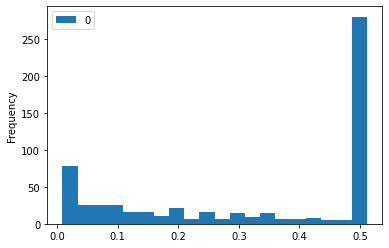

In [15]:
# plot hist for MLP eval
pd.DataFrame(abs(model.predict(X_test) - y_test)[0]).plot.hist(bins=20)

In [214]:
i = 12
print("Pred", model.predict(X_test)[i][0])
print("True", y_test[i].numpy())

2/2 [==============================] - 0s 0s/step
Pred 0.45109838
True 1.0


19/19 [==============================] - 0s 984us/step - loss: 0.1371
eval 0.13711075484752655
19/19 [==============================] - 0s 778us/step


(array([ 73.,  43.,  32.,  18.,  22.,  12.,  24.,  12.,  14.,  12.,  12.,
         16.,   4.,  11.,  16.,  33., 114., 117.,  12.,   3.]),
 array([0.00388944, 0.03333652, 0.06278361, 0.09223069, 0.12167777,
        0.15112486, 0.18057194, 0.21001902, 0.23946611, 0.26891319,
        0.29836027, 0.32780736, 0.35725444, 0.38670152, 0.41614861,
        0.44559569, 0.47504277, 0.50448986, 0.53393694, 0.56338402,
        0.5928311 ]),
 <BarContainer object of 20 artists>)

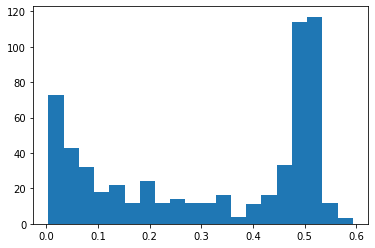

In [17]:
print("eval", model.evaluate(X_test, y_test))
pred = model.predict(X_test)
diffs = [abs(p-t).numpy()[0] for p, t in zip(pred, y_test)]
plt.hist(diffs, bins=20)